In [12]:
%matplotlib inline  

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import torch
from torch.optim import SGD
from torchvision import models
from cnn_layer_visualization import CNNLayerVisualization

Iteration: 1 Loss: -1.96
Iteration: 2 Loss: -2.95
Iteration: 3 Loss: -3.28
Iteration: 4 Loss: -5.16
Iteration: 5 Loss: -5.14
5


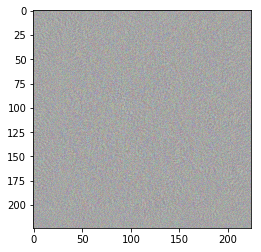

Iteration: 6 Loss: -7.26
Iteration: 7 Loss: -8.41
Iteration: 8 Loss: -11.01
Iteration: 9 Loss: -13.19
Iteration: 10 Loss: -15.23
10


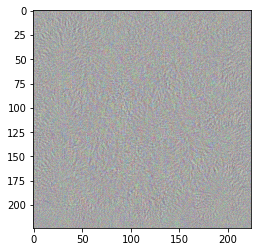

Iteration: 11 Loss: -18.97
Iteration: 12 Loss: -21.84
Iteration: 13 Loss: -25.88
Iteration: 14 Loss: -28.92
Iteration: 15 Loss: -33.12
15


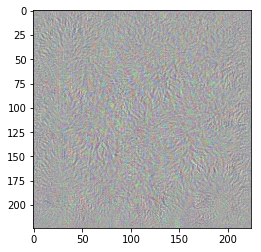

Iteration: 16 Loss: -37.36
Iteration: 17 Loss: -40.50
Iteration: 18 Loss: -46.47
Iteration: 19 Loss: -50.98
Iteration: 20 Loss: -55.28
20


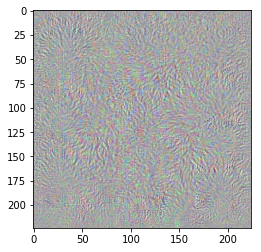

Iteration: 21 Loss: -59.47
Iteration: 22 Loss: -64.41
Iteration: 23 Loss: -69.14
Iteration: 24 Loss: -72.57
Iteration: 25 Loss: -77.67
25


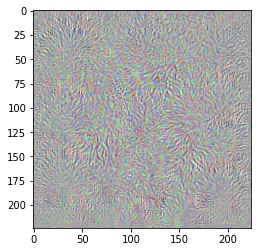

Iteration: 26 Loss: -81.68
Iteration: 27 Loss: -86.30
Iteration: 28 Loss: -90.90
Iteration: 29 Loss: -95.38
Iteration: 30 Loss: -98.97
30


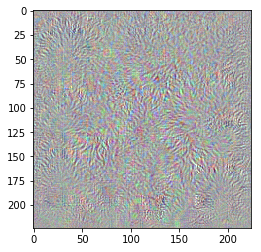

Iteration: 31 Loss: -103.66
Iteration: 32 Loss: -107.88
Iteration: 33 Loss: -111.40
Iteration: 34 Loss: -115.96
Iteration: 35 Loss: -120.40
35


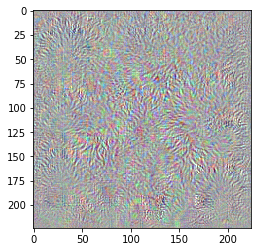

Iteration: 36 Loss: -124.84
Iteration: 37 Loss: -127.93
Iteration: 38 Loss: -131.70
Iteration: 39 Loss: -135.82
Iteration: 40 Loss: -140.76
40


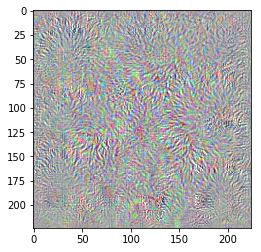

Iteration: 41 Loss: -144.41
Iteration: 42 Loss: -148.97
Iteration: 43 Loss: -152.74
Iteration: 44 Loss: -156.69
Iteration: 45 Loss: -160.76
45


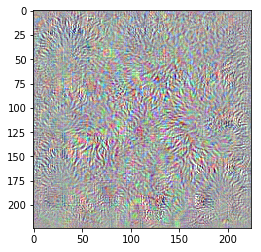

Iteration: 46 Loss: -164.93
Iteration: 47 Loss: -168.95
Iteration: 48 Loss: -172.69
Iteration: 49 Loss: -176.71
Iteration: 50 Loss: -180.84
50


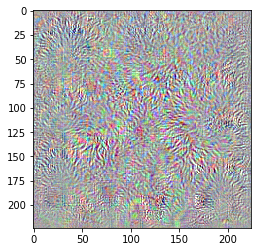

In [14]:
cnn_layer = 10
filter_pos = 1
    # Fully connected layer is not needed
pretrained_model = models.alexnet(pretrained=True).features
layer_vis = CNNLayerVisualization(pretrained_model, cnn_layer, filter_pos)


layer_vis.visualise_layer_without_hooks()


In [1]:
from guided_backprop import GuidedBackprop
from misc_functions import (get_params,
                            convert_to_grayscale,
                            save_gradient_images,
                            get_positive_negative_saliency)

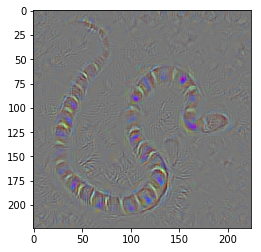

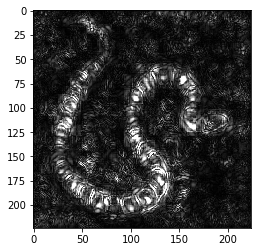

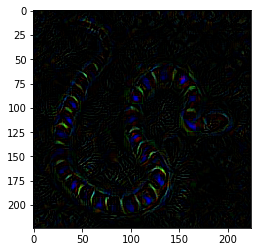

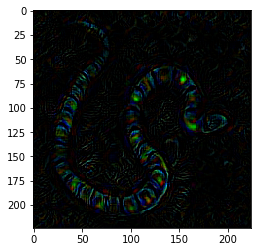

Guided backprop completed


In [6]:
target_example = 0  # Snake
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) =get_params(target_example)

# Guided backprop
GBP = GuidedBackprop(pretrained_model)
# Get gradients
guided_grads = GBP.generate_gradients(prep_img, target_class)
# Save colored gradients
save_gradient_images(guided_grads, file_name_to_export + '_Guided_BP_color')
# Convert to grayscale
grayscale_guided_grads = convert_to_grayscale(guided_grads)
# Save grayscale gradients
save_gradient_images(grayscale_guided_grads, file_name_to_export + '_Guided_BP_gray')
# Positive and negative saliency maps
pos_sal, neg_sal = get_positive_negative_saliency(guided_grads)
save_gradient_images(pos_sal, file_name_to_export + '_pos_sal')
save_gradient_images(neg_sal, file_name_to_export + '_neg_sal')
print('Guided backprop completed')

In [2]:
from misc_functions import  save_class_activation_on_image
from gradcam import GradCam

target (256, 13, 13)
(256,)
cam-0 (13, 13)
activation_map


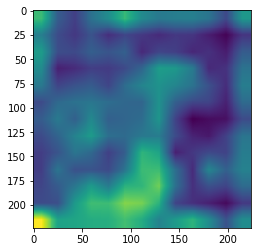

activation_heatmap


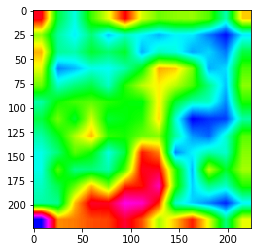

activation_heatmap on image


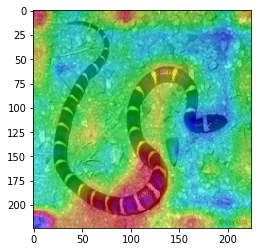

Grad cam completed


In [10]:
target_example = 0 # Snake
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) =get_params(target_example)
# Grad cam
grad_cam = GradCam(pretrained_model, target_layer=10)
# Generate cam mask
cam = grad_cam.generate_cam(prep_img, target_class)
# Save mask
save_class_activation_on_image(original_image, cam, file_name_to_export)
print('Grad cam completed')

In [6]:
import numpy as np
def guided_grad_cam(grad_cam_mask, guided_backprop_mask):
    """
        Guided grad cam is just pointwise multiplication of cam mask and
        guided backprop mask

    Args:
        grad_cam_mask (np_arr): Class activation map mask
        guided_backprop_mask (np_arr):Guided backprop mask
    """
    cam_gb = np.multiply(grad_cam_mask, guided_backprop_mask)
    return cam_gb



target (256, 13, 13)
(256,)
cam-0 (13, 13)
Grad cam completed
Guided backpropagation completed


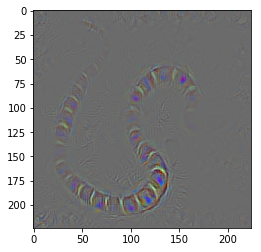

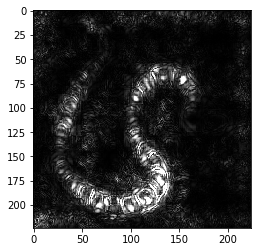

Guided grad cam completed


In [7]:
target_example = 0  # Snake
(original_image, prep_img, target_class, file_name_to_export, pretrained_model) = get_params(target_example)

# Grad cam
gcv2 = GradCam(pretrained_model, target_layer=11)
# Generate cam mask
cam = gcv2.generate_cam(prep_img, target_class)
print('Grad cam completed')

# Guided backprop
GBP = GuidedBackprop(pretrained_model)
# Get gradients
guided_grads = GBP.generate_gradients(prep_img, target_class)
print('Guided backpropagation completed')
# Guided Grad cam
cam_gb = guided_grad_cam(cam, guided_grads)
save_gradient_images(cam_gb, file_name_to_export + '_GGrad_Cam')
grayscale_cam_gb = convert_to_grayscale(cam_gb)
save_gradient_images(grayscale_cam_gb, file_name_to_export + '_GGrad_Cam_gray')
print('Guided grad cam completed')
